In [1]:
%matplotlib inline

import numpy as np
import os
import json
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
nproc = range(1, 17)

In [3]:
def speedup(t_serial, t):
    return t_serial/t

In [4]:
def read_profiling_files(profile_dir_path=".", drop_multinode=False, drop_singlenode=False):
    profiling_data = pd.DataFrame()

    json_filenames = [file for file in os.listdir(profile_dir_path) if file.endswith("_profiling.json")]

    if(drop_singlenode):
        json_filenames = [file for file in json_filenames if "1_nodes" not in file]

    if(drop_multinode):
        json_filenames = [file for file in json_filenames if "1_nodes" in file]

    for json_filename in json_filenames:
        with open(os.path.join(profile_dir_path, json_filename)) as json_file:
            profiling_data = profiling_data.append(json.load(json_file), ignore_index=True)
            profiling_data = profiling_data.sort_values(by=["n_processes"], ignore_index=True)

    profiling_data.n_processes = profiling_data.n_processes.astype(int)
    profiling_data = profiling_data.sort_values(by=["n_processes"], ignore_index=True)

    return profiling_data

## Weak scaling

In [5]:
# DGX-2
#weak_scaling_profiling_data = read_profiling_files("output_dgx-2/weak_scaling/2022-06-09T134809/")
weak_scaling_profiling_data = read_profiling_files("output_dgx-2/weak_scaling/2022-06-23T154025/")

# HGX
#weak_scaling_profiling_data = read_profiling_files("output_hgx/weak_scaling/2022-06-16T162931/")
##weak_scaling_profiling_data = read_profiling_files("output_hgx/weak_scaling/2022-06-16T170630/")

# Saga
#singlenode_weak_scaling_profiling_data = read_profiling_files("output_saga/weak_scaling/2022-06-16T151516/", drop_multinode=True)
#multinode_weak_scaling_profiling_data = read_profiling_files("output_saga/weak_scaling/2022-06-16T151516/", drop_singlenode=True)

print(weak_scaling_profiling_data)
#print(singlenode_weak_scaling_profiling_data)
#print(multinode_weak_scaling_profiling_data)

       t_init     t_total                                            outfile  \
0   14.511714  181.754037  /work/martinls/232557/ShallowWaterGPU/mpi_out_...   
1   15.153404  188.838794  /work/martinls/232558/ShallowWaterGPU/mpi_out_...   
2   15.607471  190.535054  /work/martinls/232589/ShallowWaterGPU/mpi_out_...   
3   15.332916  188.146165  /work/martinls/232590/ShallowWaterGPU/mpi_out_...   
4   15.941363  193.263406  /work/martinls/232591/ShallowWaterGPU/mpi_out_...   
5   16.805506  194.776481  /work/martinls/232592/ShallowWaterGPU/mpi_out_...   
6   18.009921  198.615131  /work/martinls/232593/ShallowWaterGPU/mpi_out_...   
7   17.990572  199.018155  /work/martinls/232594/ShallowWaterGPU/mpi_out_...   
8   19.366701  202.898836  /work/martinls/232595/ShallowWaterGPU/mpi_out_...   
9   19.890607  205.122811  /work/martinls/232596/ShallowWaterGPU/mpi_out_...   
10  20.974516  207.287065  /work/martinls/232597/ShallowWaterGPU/mpi_out_...   
11  21.358601  209.105944  /work/martinl

## Strong scaling

In [6]:
def amdahls_speedup(parallel_share, nproc):
    serial_share = 1.0 - parallel_share
    return [1.0 / (serial_share + parallel_share / float(n)) for n in nproc]

In [7]:
def gustafsons_speedup(parallel_share, nproc):
    serial_share = 1.0 - parallel_share
    return [serial_share + parallel_share * float(n) for n in nproc]

In [8]:
# DGX-2
#strong_scaling_profiling_data = read_profiling_files("output_dgx-2/strong_scaling/2022-06-09T160712/")
strong_scaling_profiling_data = read_profiling_files("output_dgx-2/strong_scaling/2022-06-23T172838/")

# HGX
#strong_scaling_profiling_data = read_profiling_files("output_hgx/strong_scaling/2022-06-16T152945/")

# Saga
#singlenode_strong_scaling_profiling_data = read_profiling_files("output_saga/strong_scaling/2022-06-16T190721/", drop_multinode=True)
#multinode_strong_scaling_profiling_data = read_profiling_files("output_saga/strong_scaling/2022-06-16T190721/", drop_singlenode=True)

print(strong_scaling_profiling_data)
#print(singlenode_strong_scaling_profiling_data)
#print(multinode_strong_scaling_profiling_data)

       t_init     t_total                                            outfile  \
0   15.227155  189.004926  /work/martinls/232634/ShallowWaterGPU/mpi_out_...   
1   12.726498  145.335962  /work/martinls/232635/ShallowWaterGPU/mpi_out_...   
2   11.482033  123.139408  /work/martinls/232636/ShallowWaterGPU/mpi_out_...   
3   10.548483  100.839853  /work/martinls/232637/ShallowWaterGPU/mpi_out_...   
4   10.746949   95.866956  /work/martinls/232638/ShallowWaterGPU/mpi_out_...   
5   10.345715   87.113081  /work/martinls/232639/ShallowWaterGPU/mpi_out_...   
6    9.915406   75.785243  /work/martinls/232640/ShallowWaterGPU/mpi_out_...   
7   10.107682   69.963608  /work/martinls/232641/ShallowWaterGPU/mpi_out_...   
8   10.620777   66.039795  /work/martinls/232642/ShallowWaterGPU/mpi_out_...   
9   11.305829   63.000684  /work/martinls/232643/ShallowWaterGPU/mpi_out_...   
10  11.614343   60.330283  /work/martinls/232644/ShallowWaterGPU/mpi_out_...   
11  12.639043   60.506280  /work/martinl

## Plotting

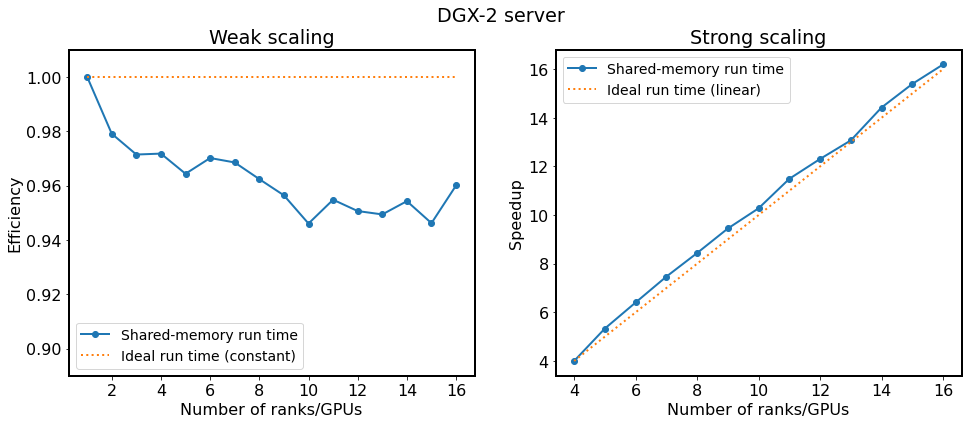

In [9]:
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2

fig, (ax_weak, ax_strong) = plt.subplots(1, 2, figsize=(16,6))

t_total_no_init_or_file_io = weak_scaling_profiling_data["t_total"] \
                            -weak_scaling_profiling_data["t_init"] \
                            -weak_scaling_profiling_data["t_nc_write"] \
                            -weak_scaling_profiling_data["t_sim_init"]

t_total_halo_exchange = weak_scaling_profiling_data["t_mpi_halo_exchange_download"] \
                        +weak_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"] \
                        +weak_scaling_profiling_data["t_mpi_halo_exchange_upload"]

#ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
#    speedup(t_total_no_init_or_file_io[0], t_total_no_init_or_file_io), label="Total (no init or file I/O)")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_full_step"][0], weak_scaling_profiling_data["t_full_step"]), label="Shared-memory run time", marker="o")
ax_weak.locator_params(axis="x", nbins=16)
ax_weak.set_ylim(0.89, 1.01)

"""
ax_weak.plot(weak_scaling_profiling_data["n_processes"][0:].to_numpy(dtype="int"), 
    speedup(t_total_halo_exchange[0], t_total_halo_exchange[0:]), label="Halo exchange (D/E/U)", linestyle="dashed")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_total"][0], weak_scaling_profiling_data["t_total"]), label="Total")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"][0], weak_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"]), label="MPI send/recv")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_mpi_halo_exchange_download"][0], weak_scaling_profiling_data["t_mpi_halo_exchange_download"]), label="Download (GPU->CPU)")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_mpi_halo_exchange_upload"][0], weak_scaling_profiling_data["t_mpi_halo_exchange_upload"]), label="Upload (CPU->GPU)")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_nc_write"][0], weak_scaling_profiling_data["t_nc_write"]), label="Write to file")

ax_weak.plot(weak_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(weak_scaling_profiling_data["t_init"][0], weak_scaling_profiling_data["t_init"]), label="Init")
"""

ax_weak.plot(nproc, np.ones(len(nproc)), label="Ideal run time (constant)", linestyle="dotted")

ax_weak.set_xlabel("Number of ranks/GPUs")
ax_weak.set_ylabel("Efficiency")
ax_weak.legend(loc="lower left")
ax_weak.title.set_text("Weak scaling")
#fig.show()

##############################################

#fig, ax = plt.subplots(figsize=(8,6))

t_total_no_init_or_file_io = strong_scaling_profiling_data["t_total"] \
                            -strong_scaling_profiling_data["t_init"] \
                            -strong_scaling_profiling_data["t_nc_write"] \
                            -strong_scaling_profiling_data["t_sim_init"]

t_total_halo_exchange = strong_scaling_profiling_data["t_mpi_halo_exchange_download"] \
                        +strong_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"] \
                        +strong_scaling_profiling_data["t_mpi_halo_exchange_upload"]

#ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
#    speedup(t_total_no_init_or_file_io[0], t_total_no_init_or_file_io)*4, label="Total (no init or file I/O)")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_full_step"][0], strong_scaling_profiling_data["t_full_step"])*4, label="Shared-memory run time", marker="o")

"""
ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(t_total_halo_exchange[0], t_total_halo_exchange)*4, label="Halo exchange (D/E/U)", linestyle="dashed")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_total"][0], strong_scaling_profiling_data["t_total"])*4, label="Total")
    
ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"][0], strong_scaling_profiling_data["t_mpi_halo_exchange_sendreceive"]), label="MPI send/recv")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_mpi_halo_exchange_download"][0], strong_scaling_profiling_data["t_mpi_halo_exchange_download"]), label="Download (GPU->CPU)")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_mpi_halo_exchange_upload"][0], strong_scaling_profiling_data["t_mpi_halo_exchange_upload"]), label="Upload (CPU->GPU)")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_nc_write"][0], strong_scaling_profiling_data["t_nc_write"]), label="Write to file")

ax_strong.plot(strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(strong_scaling_profiling_data["t_init"][0], strong_scaling_profiling_data["t_init"]), label="Init")
"""

#ax_strong.plot(nproc, amdahls_speedup(0.9, nproc), label="Amdahls 90%", linestyle="dashed")
#ax_strong.plot(nproc, amdahls_speedup(0.5, nproc), label="Amdahls 50%", linestyle="dashed")
#ax_strong.plot(nproc, amdahls_speedup(0.1, nproc), label="Amdahls 10%", linestyle="dashed")

#ax_strong.plot(nproc, gustafsons_speedup(0.9, nproc), label="Gustafsons 90%")
#ax_strong.plot(nproc, gustafsons_speedup(0.5, nproc), label="Gustafsons 50%")
#ax_strong.plot(nproc, gustafsons_speedup(0.1, nproc), label="Gustafsons 10%")

ax_strong.plot(nproc[3:], nproc[3:], label="Ideal run time (linear)", linestyle="dotted")

ax_strong.set_xlabel("Number of ranks/GPUs")
ax_strong.set_ylabel("Speedup")
ax_strong.legend(loc="upper left")
ax_strong.title.set_text("Strong scaling")
fig.suptitle("DGX-2 server")
fig.show()

fig.savefig("dgx-2-scaling.pdf", bbox_inches='tight')

/cluster/projects/nn9882k/martinls/.conda/envs/ShallowWaterGPU_HPC/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


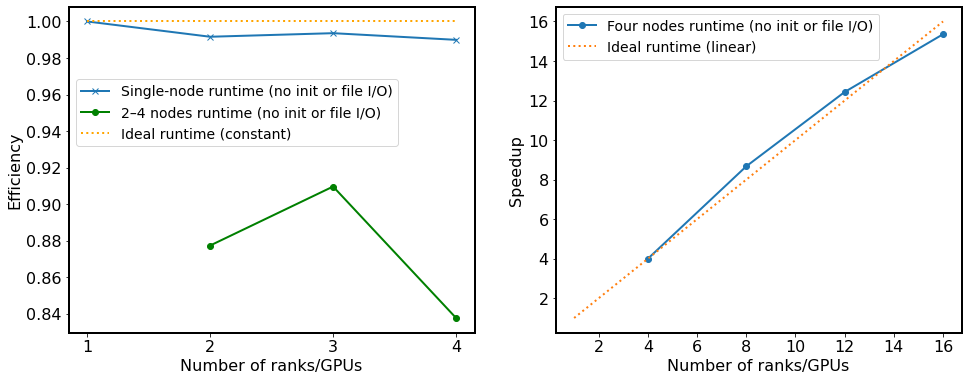

In [34]:
###
### Saga
###

plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2

fig, (ax_weak, ax_strong) = plt.subplots(1, 2, figsize=(16,6))

ax_weak.plot(singlenode_weak_scaling_profiling_data["n_processes"][0:4].to_numpy(dtype="int"), 
    speedup(singlenode_weak_scaling_profiling_data["t_full_step"][0], singlenode_weak_scaling_profiling_data["t_full_step"][0:4]), 
    label="Single-node runtime (no init or file I/O)", marker="x")

ax_weak.plot(multinode_weak_scaling_profiling_data["n_processes"][0:3].to_numpy(dtype="int"), 
    speedup(singlenode_weak_scaling_profiling_data["t_full_step"][0], multinode_weak_scaling_profiling_data["t_full_step"][0:3]), 
    label="2–4 nodes runtime (no init or file I/O)", marker="o", color="green")

ax_weak.locator_params(axis="x", nbins=4)

ax_weak.plot(nproc[0:4], np.ones(len(nproc[0:4])), label="Ideal runtime (constant)", linestyle="dotted", color="orange")

ax_weak.set_xlabel("Number of ranks/GPUs")
ax_weak.set_ylabel("Efficiency")
ax_weak.legend(loc="upper left", bbox_to_anchor=[0.0, 0.8])

##############################################

#ax_strong.plot(singlenode_strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
#    speedup(singlenode_strong_scaling_profiling_data["t_full_step"][0], singlenode_strong_scaling_profiling_data["t_full_step"])*4, 
#    label="Single-node (no init or file I/O)", marker="x")

ax_strong.plot(multinode_strong_scaling_profiling_data["n_processes"].to_numpy(dtype="int"), 
    speedup(multinode_strong_scaling_profiling_data["t_full_step"][0], multinode_strong_scaling_profiling_data["t_full_step"])*4, 
    label="Four nodes runtime (no init or file I/O)", marker="o")

ax_strong.locator_params(axis="x", nbins=16)

ax_strong.plot(nproc[0:], nproc[0:], label="Ideal runtime (linear)", linestyle="dotted")

ax_strong.set_xlabel("Number of ranks/GPUs")
ax_strong.set_ylabel("Speedup")
ax_strong.legend(loc="upper left")
fig.show()

fig.savefig("saga-scaling.pdf", bbox_inches='tight')

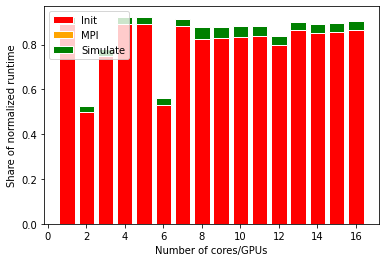

In [18]:
bar_width = 0.8

share_init = (profiling_data["t_init"]+profiling_data["t_sim_init"])/profiling_data["t_total"]
share_mpi = profiling_data["t_step_mpi_halo_exchange"]/profiling_data["t_total"]
share_simulate = profiling_data["t_step_mpi"]/profiling_data["t_total"]

plt.bar(profiling_data["n_processes"], 
    share_init, color='red', edgecolor='white', width=bar_width, label="Init")

plt.bar(profiling_data["n_processes"], 
    share_mpi, bottom=share_init, color='orange', edgecolor='white', width=bar_width, label="MPI")

plt.bar(profiling_data["n_processes"], 
    share_simulate, bottom=share_init+share_mpi , color='green', edgecolor='white', width=bar_width, label="Simulate")

plt.xlabel("Number of cores/GPUs")
plt.ylabel("Share of normalized runtime")
plt.legend(loc="upper left")

plt.show()

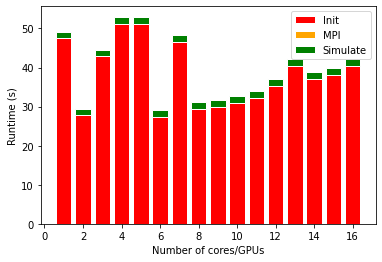

In [19]:
bar_width = 0.8

share_init = (profiling_data["t_init"]+profiling_data["t_sim_init"])
share_mpi = profiling_data["t_step_mpi_halo_exchange"]
share_simulate = profiling_data["t_step_mpi"]

plt.bar(profiling_data["n_processes"], 
    share_init, color='red', edgecolor='white', width=bar_width, label="Init")

plt.bar(profiling_data["n_processes"], 
    share_mpi, bottom=share_init, color='orange', edgecolor='white', width=bar_width, label="MPI")

plt.bar(profiling_data["n_processes"], 
    share_simulate, bottom=share_init+share_mpi , color='green', edgecolor='white', width=bar_width, label="Simulate")

plt.xlabel("Number of cores/GPUs")
plt.ylabel("Runtime (s)")
plt.legend(loc="upper right")

plt.show()